# Insurance Medical Cost Prediction
Dataset Description: 
- age: age of primary beneficiary 
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking 
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwes
- charges: Individual medical costs billed by health insurance

# 1- Data Loading 

Import necessary python modules
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 

Load the data

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_data='/content/drive/MyDrive/Colab Notebooks/ML Final Project /Linear and Logistic /insurance.csv'

Read and visualize the data

In [4]:
# read CSV file in Pandas
data = pd.read_csv(path_to_data)

# display first 10 rows
data.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

# 2. Exploratory Data Analysis

how many rowns and columns in the dataset

In [5]:
rows=data.shape[0]
columns=data.shape[1]
print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function describe(), we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [7]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Distribution of charges


---


let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

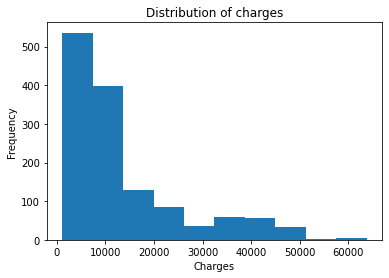

In [8]:
# plot the histogram of the charges
data["charges"].plot(kind="hist")
plt.title("Distribution of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, let's see how many smokers vs non-smokers we have.

In [9]:
# select smokers 
smokers = data[(data.smoker == "yes")]
# select non smokers
non_smokers = data[(data.smoker == "no")]
print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


Let's plot the charges for both

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

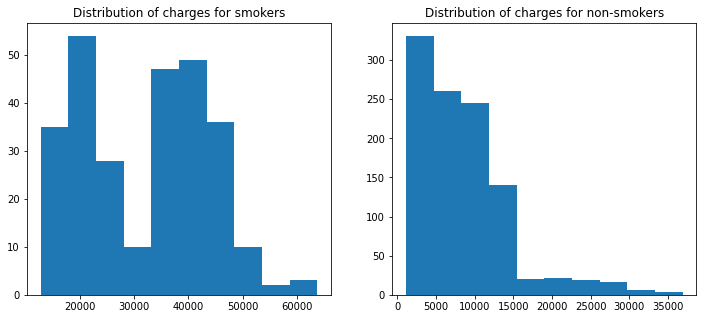

In [10]:
# create the figure
fig = plt.figure(figsize=(12,5))
# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for smokers')
# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(non_smokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment 

Correlation between age and cost of treatment 

First, let's look at the distribution of age in our dataset, and then look at how age affects the cost of treatment.

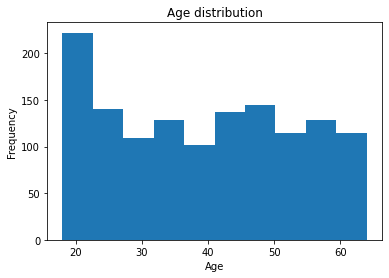

In [11]:
# plot histogram for age distribution
plt.hist(data["age"])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Let's plot the correlation between age and cost of treatment



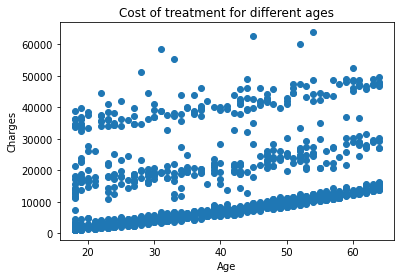

In [12]:
# draw a scatter plot to show correlation between age and charges
plt.scatter(data["age"], data["charges"])
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Let's check if smoking also affects this curve.

so lets show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

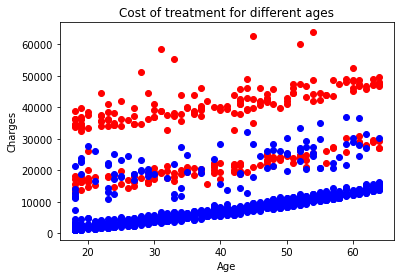

In [13]:
plt.scatter(smokers["age"], smokers["charges"], color='r') # red: smokers
plt.scatter(non_smokers["age"], non_smokers["charges"], color='b') # blue" non-smokers
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Correlation between BMI and cost of treatment 


---

so let's first look at the distribution of BMI in our BMI and how it affects the cost of treatment

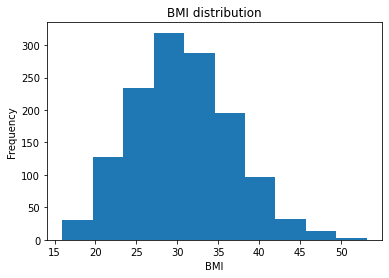

In [14]:
# draw a histogram to show the distribution of BMI
data["bmi"].plot(kind="hist")
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.

In [15]:
# select obese people
obese = data[(data["bmi"] >= 30)]
# select overweight people
overweight = data[(data["bmi"] >= 25) & (data["bmi"] < 30)]
# select healthy people 
healthy = data[(data["bmi"] < 25) & (data["bmi"] >= 18 )]
# select underweight people 
underweight = data[(data["bmi"] < 18 )]

print('There are {} obese, {} overweight, {} healthy, and {} underweight individuals.'.format(obese.shape[0], overweight.shape[0], healthy.shape[0], underweight.shape[0]))


There are 707 obese, 386 overweight, 230 healthy, and 15 underweight individuals.


To compare, let's plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing obese data in red, overweight data in yellow and healthy data in green.

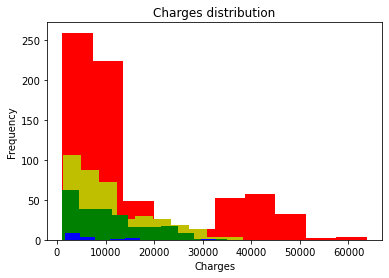

In [16]:
plt.hist(obese["charges"], color='r')
plt.hist(overweight["charges"], color='y')
plt.hist(healthy["charges"], color='g')
plt.hist(underweight["charges"], color='b')
plt.title("Charges distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Patients with BMI above 30 spend more on treatment

# 3- Data Processing 

let's start by removing missing data

In [17]:
# print how many missing value in each column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in this dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Remove unused columns 


---
lets remove the region column 


In [19]:
# dropping the region feature
data.drop("region", axis=1, inplace=True)
data.head()

age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520

Convert Categorical columns to numerical


---

- sex column: male/female --> 0/1
- smoker column: no/yes --> 0/1

In [20]:
# define dictionary 
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()


age  sex     bmi  children  smoker      charges
0   19    1  27.900         0       1  16884.92400
1   18    0  33.770         1       0   1725.55230
2   28    0  33.000         3       0   4449.46200
3   33    0  22.705         0       0  21984.47061
4   32    0  28.880         0       0   3866.85520

Normalization 


---

Let's scale all the columns by dividing by the maximum

In [21]:
# get the max of each column
data_max = data.max()
data_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64

In [22]:
# divide each column by its maximum value
data = data.divide(data_max)
data.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean      0.612610     0.494768     0.577139     0.218984     0.204783   
std       0.219531     0.500160     0.114779     0.241099     0.403694   
min       0.281250     0.000000     0.300395     0.000000     0.000000   
25%       0.421875     0.000000     0.494942     0.000000     0.000000   
50%       0.609375     0.000000     0.572181     0.200000     0.000000   
75%       0.796875     1.000000     0.652997     0.400000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           charges  
count  1338.000000  
mean      0.208097  
std       0.189900  
min       0.017592  
25%       0.074334  
50%       0.147122  
75%       0.260935  
max       1.000000

# 4- MultiLinear Regression Model Training

#### Data splits

Before training, we need to split data into training (80%) & testing (20%)

In [23]:
# store all columns except last one as inputs in X
X = data.iloc[:,0:-1].values
# store the last column as the output (label) in y  
y = data.iloc[:,-1].values  
# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1070, 5) (1070,)
(268, 5) (268,)


### Optimization Using Gradient Descent
Reminder: multi linear regression problem <br>
* The equation is y = **a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5 <br>
In other words, we have the following: <br>
* charges = **a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * smoker
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a


In [24]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a):
  #We take the features each one alone
  x1 = x[:,0]
  x2 = x[:,1]
  x3 = x[:,2]
  x4 = x[:,3]
  x5 = x[:,4]
  #Calculate the number of examples
  n_examples = x.shape[0]
  #Initialize the coefficients
  a0 = initial_a[0]
  a1 = initial_a[1]
  a2 = initial_a[2]
  a3 = initial_a[3]
  a4 = initial_a[4]
  a5 = initial_a[5]
  #Costs List
  costs = []
  #The Gradient Descent Process
  for i in range(nb_iterations):
    #Calculate the predicted charges
    y_pred = a0 + a1 * x1 + a2 * x2 + a3 * x3 + a4 * x4 + a5 * x5
    #Calculate the cost
    c = np.sum((y - y_pred)**2)/n_examples
    costs.append(c)
    #Break the loop if we reach a desired cost --> No need for training more
    if (c<0.001):
      break
    #Calculate the derivatives for each coefficient
    a0_der = -2*np.sum(y - y_pred)/n_examples
    a1_der = -2*np.sum(x1 * (y - y_pred))/n_examples
    a2_der = -2*np.sum(x2 * (y - y_pred))/n_examples
    a3_der = -2*np.sum(x3 * (y - y_pred))/n_examples
    a4_der = -2*np.sum(x4 * (y - y_pred))/n_examples
    a5_der = -2*np.sum(x5 * (y - y_pred))/n_examples
    #Update the coefficients using Gradient Descent Update Rule
    a0 = a0 - learning_rate * a0_der
    a1 = a1 - learning_rate * a1_der
    a2 = a2 - learning_rate * a2_der
    a3 = a3 - learning_rate * a3_der
    a4 = a4 - learning_rate * a4_der
    a5 = a5 - learning_rate * a5_der
  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

In [25]:
#Calculate the number of features
n_features = x_train.shape[1]

#Initialize Coefficients. We have n_features + 1 coefficients 
initial_a = np.random.rand(n_features + 1)

#Initialize other learning parameters
n_iterations = 1000
learning_rate = 0.01

costs, a = Gradient_descent(x_train, y_train, learning_rate, n_iterations, initial_a)

print ("Model Equation is: ", a[0],"+",
       a[1]," * age + ",
       a[2], " * sex + ", 
       a[3], " * bmi + ",
       a[4], " * children + ",
       a[5], " * smoker" )

Model Equation is:  -0.3069520622888105 + 0.18327376202438514  * age +  0.004479813312295563  * sex +  0.502156459680446  * bmi +  0.15515883089386204  * children +  0.37520912323003713  * smoker


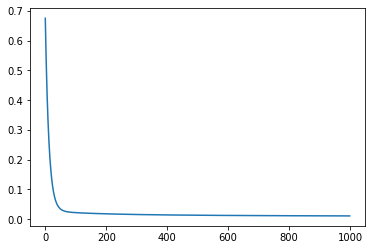

[0.6748827563789122, 0.6220333824022731, 0.5734936737410943, 0.5289116192382803, 0.4879639638661068, 0.4503538595774284, 0.41580870806408216, 0.3840781797451627, 0.35493239458855136, 0.3281602515451823, 0.3035678944555345, 0.2809773032796311, 0.2602250004125853, 0.2411608626840987, 0.22364703040835188, 0.20755690555602502, 0.19277423176785977, 0.17919224952394638, 0.16671292032909454, 0.15524621427621035, 0.1447094558101886, 0.13502672293778953, 0.12612829551737784, 0.1179501486190811, 0.11043348727346312, 0.10352431922759274, 0.09717306260359843, 0.0913341856084472, 0.08596587567661099, 0.08102973564118277, 0.07649050472542764, 0.07231580232713232, 0.0684758927337584, 0.06494346905851532, 0.061693454827153285, 0.05870282177354949, 0.05595042251995522, 0.053416836925942596, 0.051084230989424675, 0.04893622727434206, 0.04695778592337684, 0.045135095390979894, 0.0434554721026369, 0.04190726831116961, 0.04047978748043772, 0.03916320658151191, 0.03794850473662246, 0.03682739769232004, 0.03

In [26]:
plt.plot(costs)
plt.show()
print(costs)

In [27]:
def Gradient_descent_vectorized (x, y, learning_rate, nb_iterations, initial_a):
  #Calculate the number of examples
  n_examples = x.shape[0]

  #We add a column of "1" to the x so that we can perform matrix multiplications later
  ones_column = np.ones((n_examples,1))
  new_x = np.hstack([ones_column, x])

  #Initialize the coefficients
  a = initial_a

  #Gradient Descent Process
  for i in range(nb_iterations):

    #Calculate predicted value for all examples
    y_pred = np.dot(new_x, a)

    #Calculate error
    error = y - y_pred

    #Expand dimensions to use multiply: Broadcasting purpose
    error = np.expand_dims(error, axis=-1)
    
    #Calculate the derivatives 
    a_der = -2*np.sum(np.multiply(new_x, error), axis = 0)/n_examples

    #Update using GD update rule
    a = a - learning_rate * a_der

  return a


In [28]:
n_features = x_train.shape[1]
initial_a  = np.random.rand(n_features+1)

learning_rate = 0.01

nb_iterations = 1000

a = Gradient_descent_vectorized(x_train, y_train, learning_rate, nb_iterations, initial_a)

print ("Equation is: ", a[0],
       "+",a[1]," * age + ",
       a[2], " * sex + ", 
       a[3], " * bmi + ",
       a[4], " * children + ",
       a[5], " * smoker" )

Equation is:  -0.025346200723601376 + 0.2733245546430828  * age +  0.005489965124738018  * sex +  -0.12774706556069781  * bmi +  0.2851645094575647  * children +  0.3583501576538187  * smoker


We can see that we obtained the same result as above.

Here is the function that we'll use to make predictions

In [29]:
def predict_medical_charges (a, x):
  charges = a[0]+ np.dot(x,a[1:])
  return charges

Let's make a prediction 

In [30]:
x = x_train [0]
print("The charges for someone who is" ,x_train[0][0]*data_max[0], "years old, ", 
      "Whose gender is ", x_train[0][1]*data_max[1],
      "with a bmi of", x_train[0][2]*data_max[2],
      "and, ", x_train[0][3]*data_max[3], " children", 
      "Smoker: ", x_train[0][4]*data_max[4],
      "is around", predict_medical_charges(a, x)*data_max[-1])

The charges for someone who is 46.0 years old,  Whose gender is  1.0 with a bmi of 19.95 and,  2.0  children Smoker:  0.0 is around 15476.657281173679


###Linear Regression Model Evaluation

Now we will evaluate our model with the metrics that we studied during the course. In order to do so, we will calculated the predicted values on the test set.

In [31]:
y_predicted_test = predict_medical_charges(a,x_test)

Let's get the number of examples in the test set.

In [32]:
n_test = x_test.shape[0]
print("We have ", n_test, " test examples")

We have  268  test examples


####Mean Absolute Error (MAE)

In [33]:
MAE = np.sum(abs(y_predicted_test - y_test))/n_test
print("MAE is ", MAE)

MAE is  0.08191840138957938


####Mean Squared Error (MSE)

In [34]:
MSE = np.sum((y_predicted_test - y_test)**2)/n_test
print("MSE is ", MSE)

MSE is  0.012907885856531773


####Root Mean Squared Error (RMSE)

This is just the root of the MSE that we computed. This is another metric we can look at to evaluate our regression models.

In [35]:
RMSE = np.sqrt(np.sum((y_predicted_test - y_test)**2)/n_test)
print("RMSE is ", RMSE)

RMSE is  0.11361287715981747


One thing to note is that the smaller these errors get, the better our regression model is.

### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.

In [36]:
# define our regression model
model = LinearRegression()  

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


####Features importance (Coefficients)


[2.57994404e-01 1.24693978e-04 2.72882841e-01 3.34994169e-02
 3.70922762e-01]


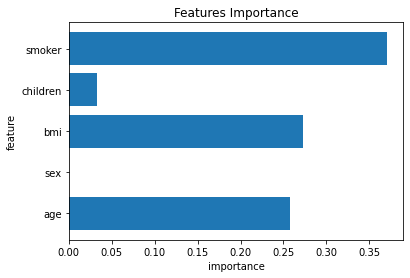

In [37]:
columns_names = data.columns[0:-1].values
features_importance = model.coef_
print(features_importance)
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

As you can see, we obtain the same coefficient values in the 3 approaches that we considered. Our computed values from GD are the same as the values that we got from sickit learn, which means the implementation was correct.

####Evaluation using Scikit learn

We start by calculating the predicted values for this model.

In [38]:
y_pred = model.predict(x_test)

Now we will evaluate the sklearn model using the sklearn library to get error metrics.

In [39]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.06607270688455172
Mean Squared Error (MSE): 0.008355553323757202
Root Mean Squared Error (RMSE): 0.09140871579754964


We can see that the values are so close to the ones we got from the model we built ourselves.



---
#Classification based on several features with Gradient Descent


Now, we will predict based on all the features that we have if the person is smoker or not a smoker, and we'll use GD as optimization tool.
We'll follow the same steps as above.

In [40]:
# store all columns except Smoker as inputs in X
X = data.loc[: , data.columns!='smoker'].values
# store the Smoker column as the output (label) in y  
y = data.iloc[:,-2].values  
# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1070, 5) (1070,)
(268, 5) (268,)


##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function
We start by implementing the sigmoid function

In [41]:
def sigmoid(v):
  return 1/(1+np.exp(-v))

We remind you that this is a classification based on several features <br>
* The equation is y = sigmoid(**a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5) <br>
In other words, we have the following: <br>
* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)
* This represents the probability of a person being smoker given the features that we mentioned. 
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a

In [42]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):
  #We take the features each one alone
  x1 = x[:,0]
  x2 = x[:,1]
  x3 = x[:,2]
  x4 = x[:,3]
  x5 = x[:,4]

  #Calculate the number of examples
  n_examples = x.shape[0]

  #Initialize the coefficients
  a0 = initial_a[0]
  a1 = initial_a[1]
  a2 = initial_a[2]
  a3 = initial_a[3]
  a4 = initial_a[4]
  a5 = initial_a[5]

  #Costs List
  costs = []
  #The Gradient Descent Process
  for i in range(nb_iterations):

    #Calculate the predicted charges
    y_pred = sigmoid(a0 + a1 * x1 + a2 * x2 + a3 * x3 + a4 * x4 + a5 * x5)
    
    #Calculate the cost
    c = -np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))/n_examples
    costs.append(c)

    #Break the loop if we reach a desired cost --> No need for training more
    if (c<0.01):
      break

    #Calculate the derivatives for each coefficient
    a0_der = -1*np.sum(y - y_pred)/n_examples
    a1_der = -1*np.sum(x1 * (y - y_pred))/n_examples
    a2_der = -1*np.sum(x2 * (y - y_pred))/n_examples
    a3_der = -1*np.sum(x3 * (y - y_pred))/n_examples
    a4_der = -1*np.sum(x4 * (y - y_pred))/n_examples
    a5_der = -1*np.sum(x5 * (y - y_pred))/n_examples

    #Update the coefficients using Gradient Descent Update Rule
    a0 = a0 - learning_rate * a0_der
    a1 = a1 - learning_rate * a1_der
    a2 = a2 - learning_rate * a2_der
    a3 = a3 - learning_rate * a3_der
    a4 = a4 - learning_rate * a4_der
    a5 = a5 - learning_rate * a5_der

    

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now, we will train our model.

In [43]:
#Calculate the number of features
n_features = x_train.shape[1]

#Initialize Coefficients. We have n_features + 1 coefficients 
initial_a = np.random.rand(n_features + 1)

#Initialize other learning parameters
n_iterations = 1000
learning_rate = 0.01

costs, a = Gradient_descent_classification(x_train, y_train, learning_rate, n_iterations, initial_a)

print ("Model Equation is: sigmoid(", a[0],"+",
       a[1]," * age + ",
       a[2], " * sex + ", 
       a[3], " * bmi + ",
       a[4], " * children + ",
       a[5], " * charges)" )

Model Equation is: sigmoid( -0.7995538342425175 + -0.04917258760725922  * age +  -0.41514779786633205  * sex +  -0.6707048336616079  * bmi +  -0.016738516244744803  * children +  0.6757317712808603  * charges)


Now to predict we implement the following function to deal with a "batch" of data.

In [44]:
def predict_smoker(x, a):
  ones = np.ones((x.shape[0],1))
  new_x = np.hstack([ones,x])
  result = sigmoid(np.dot(new_x,a))
  result = result>0.5 #Here we obtain a True/False array
  result = result.astype(int) # We Change those values to 0 and 1
  return result

In [45]:
y_test_predicted = predict_smoker(x_test,a)

##Classifier Evaluation

###Accuracy Score

In [46]:
y_wrong = np.count_nonzero(y_test - y_test_predicted, axis = 0)
y_correct = n_test - y_wrong
accuracy_score = float(y_correct)/n_test
print("Our Classifier has an accuracy score of ", accuracy_score*100, "%")

Our Classifier has an accuracy score of  79.8507462686567 %


###Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(y_test, y_test_predicted).ravel()
conf = confusion_matrix(y_test, y_test_predicted)
print("Confusion Matrix:\n",conf)

Confusion Matrix:
 [[214   0]
 [ 54   0]]
